In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [4]:
### Import data set
file_path = "./data/"

bikesharing = pd.read_csv(f"{file_path}chicago_2017_prepared.csv", parse_dates=["start_time", "end_time"])

In [5]:
### Dropping all rows not equal "Customers" and "Subscriber"
bikesharing = bikesharing.drop(bikesharing[(bikesharing["user_type"] != "Customer") & (bikesharing["user_type"] != "Subscriber")].index)
bikesharing.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,start_day,start_month,start_weekday,max_temp,min_temp,precip,start_lat,start_long,end_lat,end_long
0,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0,1,1,6,-0.6,-0.6,0.0,41.870257,-87.639474,41.880884,-87.639525
1,2017-01-01 00:02:54,2017-01-01 00:08:21,28,20,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,3660,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.914680,-87.643320,41.910522,-87.653106
2,2017-01-01 00:06:06,2017-01-01 00:18:31,620,333,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,4992,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.898203,-87.637536,41.907066,-87.667252
3,2017-01-01 00:07:28,2017-01-01 00:12:51,287,68,Franklin St & Monroe St,Clinton St & Tilden St,5637,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.880317,-87.635185,41.875885,-87.640795
4,2017-01-01 00:07:57,2017-01-01 00:20:53,300,118,Broadway & Barry Ave,Sedgwick St & North Ave,2209,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.937725,-87.644095,41.911386,-87.638677


In [6]:
### Add column 'Day of year' extracted from 'start time'
bikesharing['day_of_year'] = bikesharing['start_time'].dt.dayofyear

### Calculate and add column trip duration in seconds
bikesharing['duration'] = bikesharing["end_time"] - bikesharing["start_time"]
def get_seconds(x):
    return x.seconds
bikesharing["duration"] = bikesharing["duration"].apply(lambda x: get_seconds(x))

In [7]:
bikesharing.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,start_day,...,start_weekday,max_temp,min_temp,precip,start_lat,start_long,end_lat,end_long,day_of_year,duration
0,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0,1,...,6,-0.6,-0.6,0.0,41.870257,-87.639474,41.880884,-87.639525,1,356
1,2017-01-01 00:02:54,2017-01-01 00:08:21,28,20,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,3660,Subscriber,0,1,...,6,-0.6,-0.6,0.0,41.914680,-87.643320,41.910522,-87.653106,1,327
2,2017-01-01 00:06:06,2017-01-01 00:18:31,620,333,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,4992,Subscriber,0,1,...,6,-0.6,-0.6,0.0,41.898203,-87.637536,41.907066,-87.667252,1,745
3,2017-01-01 00:07:28,2017-01-01 00:12:51,287,68,Franklin St & Monroe St,Clinton St & Tilden St,5637,Subscriber,0,1,...,6,-0.6,-0.6,0.0,41.880317,-87.635185,41.875885,-87.640795,1,323
4,2017-01-01 00:07:57,2017-01-01 00:20:53,300,118,Broadway & Barry Ave,Sedgwick St & North Ave,2209,Subscriber,0,1,...,6,-0.6,-0.6,0.0,41.937725,-87.644095,41.911386,-87.638677,1,776


In [20]:
### Selecting features relevant for clustering
bikesharing_relevant = bikesharing[["user_type", "start_hour", "start_weekday", "min_temp", "precip", "duration", "start_lat", "start_long"]]
bikesharing_relevant

,user_type,start_hour,start_weekday,min_temp,precip,duration,start_lat,start_long
0,Customer,0,6,-0.6,0.0,356,41.870257,-87.639474
1,Subscriber,0,6,-0.6,0.0,327,41.914680,-87.643320
2,Subscriber,0,6,-0.6,0.0,745,41.898203,-87.637536
3,Subscriber,0,6,-0.6,0.0,323,41.880317,-87.635185
4,Subscriber,0,6,-0.6,0.0,776,41.937725,-87.644095
...,...,...,...,...,...,...,...,...
3828949,Subscriber,23,6,-12.8,0.0,120,41.939743,-87.658865
3828950,Subscriber,23,6,-12.8,0.0,300,41.896544,-87.630931
3828951,Subscriber,23,6,-12.8,0.0,600,41.913688,-87.652855
3828952,Subscriber,23,6,-12.8,0.0,300,41.954245,-87.654406


In [21]:
### Defining continuous, ordinal & categorical columns
continuous_cols = ["min_temp", "start_lat", "start_long"]
ordinal_cols = ["start_hour", "start_weekday", "duration"]
categorical_cols = ["user_type", "precip"]

bikesharing_relevant = bikesharing_relevant.sample(200, random_state=200).reset_index(drop=True)
### Scaling all columns that are not categorical
bikesharing_transformed = pd.DataFrame(StandardScaler().fit_transform(bikesharing_relevant[continuous_cols + ordinal_cols]), columns=bikesharing_relevant[continuous_cols + ordinal_cols].columns)
bikesharing_transformed

,min_temp,start_lat,start_long,start_hour,start_weekday,duration
0,0.689885,0.522818,-1.532066,0.208986,0.932215,0.406826
1,-0.545591,-0.860614,-1.343140,0.635488,1.421567,-0.517939
2,-1.711135,-0.553748,0.191796,1.488493,1.421567,-0.770965
3,-1.641202,1.701315,-0.479532,-1.710274,-1.514543,-0.826194
4,1.144447,-3.015675,2.872119,1.914995,-1.514543,3.753962
...,...,...,...,...,...,...
195,0.037181,1.493626,-1.904958,-1.070521,1.421567,0.280955
196,-0.603868,-0.822812,0.478834,-0.857270,-1.025192,-0.826194
197,0.748162,-0.532807,-0.777224,0.848739,-0.046488,0.513431
198,0.818095,-1.285506,1.392587,1.061991,1.421567,3.542037


In [23]:
#bikesharing_transformed["user_type"] = LabelEncoder().fit_transform(bikesharing_relevant["user_type"])
### Re-adding categorical columns to data frame
bikesharing_transformed["user_type"] = bikesharing_relevant["user_type"]
bikesharing_transformed["precip"] = bikesharing_relevant["precip"]
bikesharing_transformed

,min_temp,start_lat,start_long,start_hour,start_weekday,duration,user_type,precip
0,0.689885,0.522818,-1.532066,0.208986,0.932215,0.406826,Subscriber,0.0
1,-0.545591,-0.860614,-1.343140,0.635488,1.421567,-0.517939,Subscriber,0.0
2,-1.711135,-0.553748,0.191796,1.488493,1.421567,-0.770965,Subscriber,0.0
3,-1.641202,1.701315,-0.479532,-1.710274,-1.514543,-0.826194,Subscriber,0.0
4,1.144447,-3.015675,2.872119,1.914995,-1.514543,3.753962,Customer,0.0
...,...,...,...,...,...,...,...,...
195,0.037181,1.493626,-1.904958,-1.070521,1.421567,0.280955,Customer,1.0
196,-0.603868,-0.822812,0.478834,-0.857270,-1.025192,-0.826194,Subscriber,0.0
197,0.748162,-0.532807,-0.777224,0.848739,-0.046488,0.513431,Subscriber,0.0
198,0.818095,-1.285506,1.392587,1.061991,1.421567,3.542037,Customer,0.0


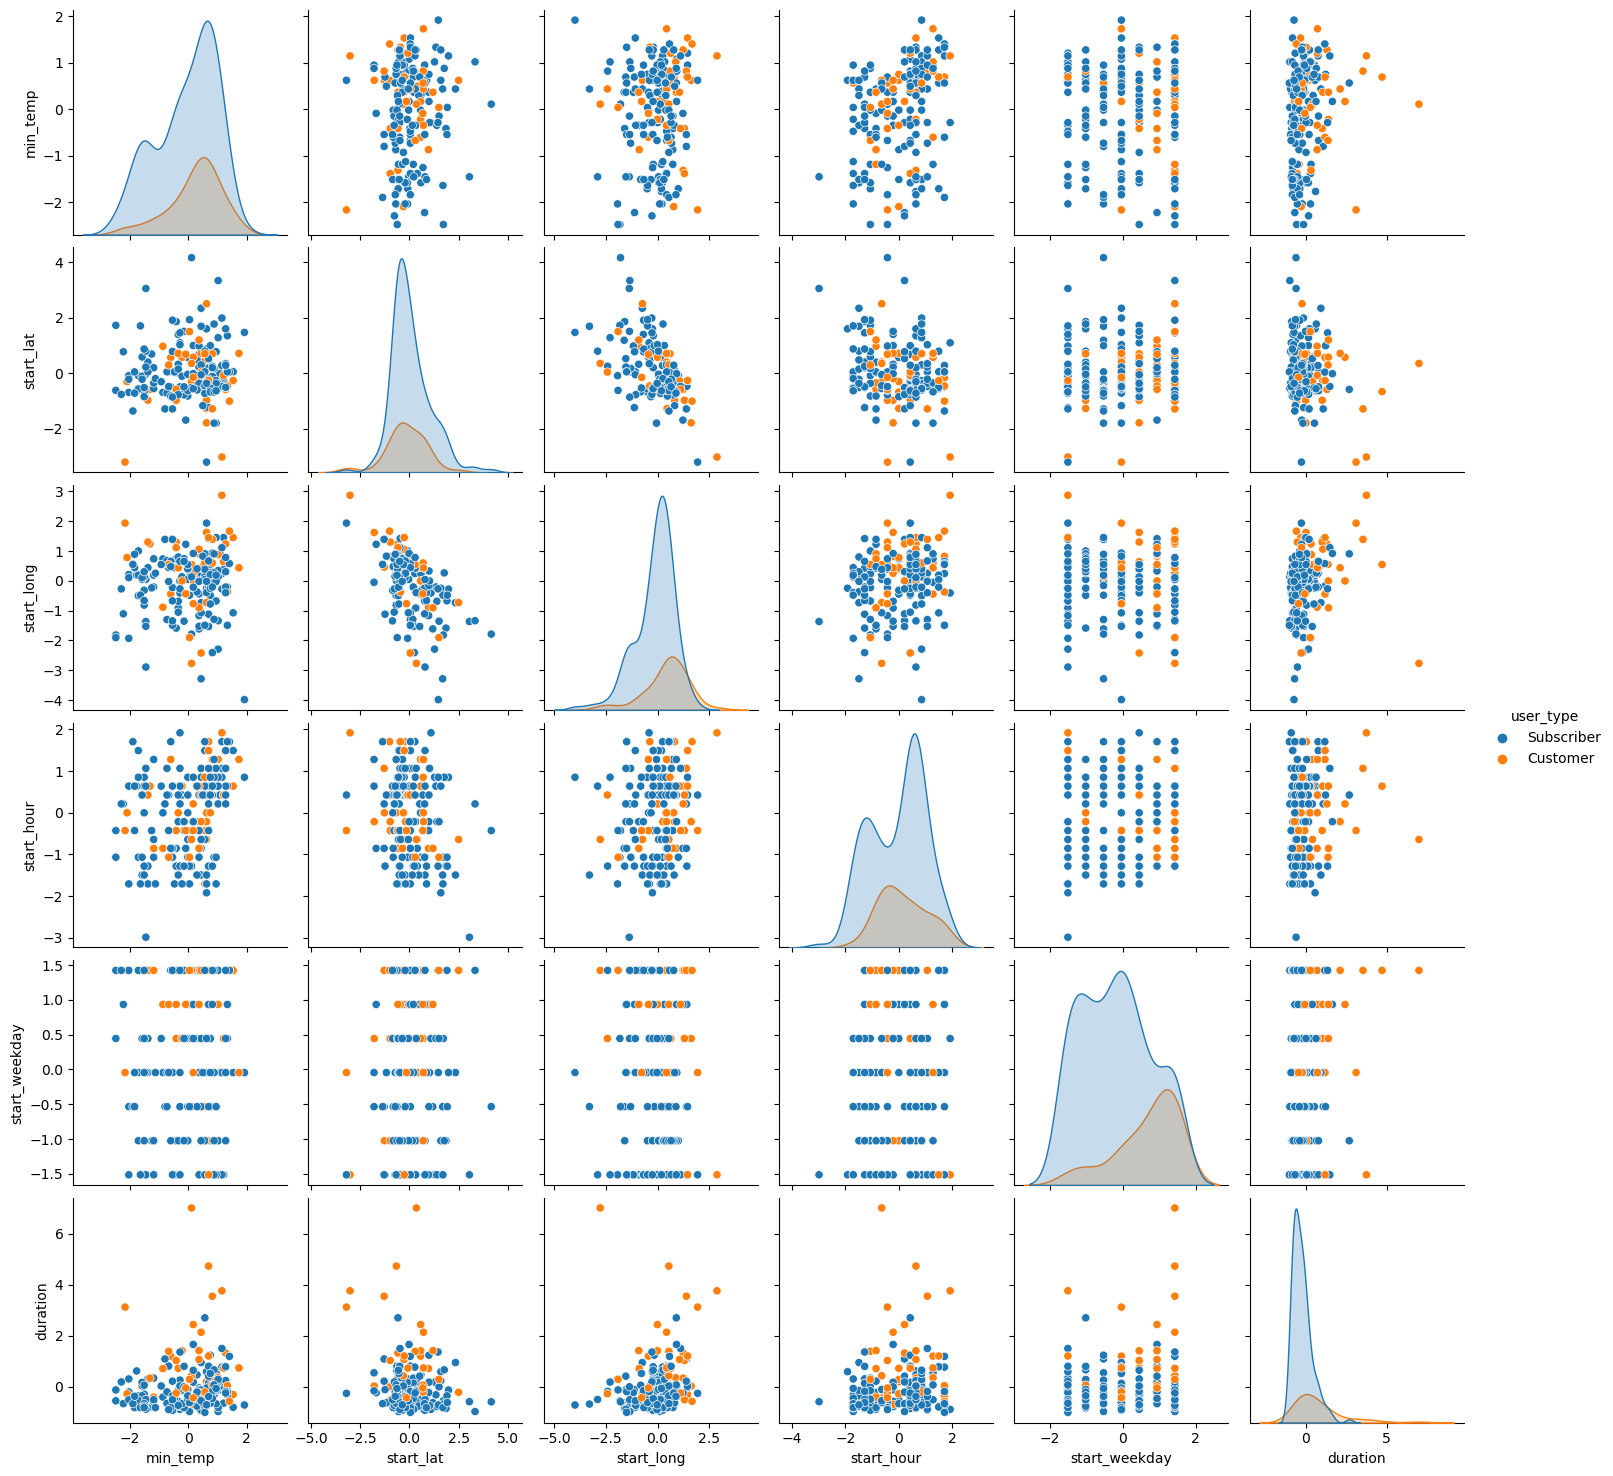

In [24]:
### Plotting with sample data set of 200 entries
sns.pairplot(data=bikesharing_transformed.sample(200, random_state=200)[continuous_cols + ordinal_cols + ["user_type"]], hue='user_type')

In [25]:
### New data frame with sample of 200 data points to conduct clustering
bikesharing_sample = bikesharing_transformed.sample(200, random_state=200)[continuous_cols + ordinal_cols]

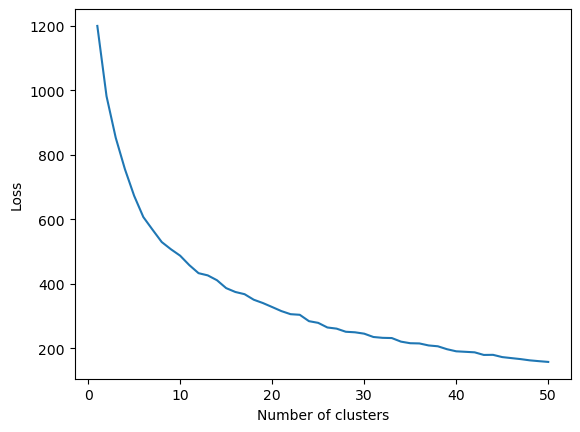

In [26]:
### Running kmeans with k_max = 50
k_max = 50
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(bikesharing_sample)
    clusters.append(k+1)
    losses.append(model.inertia_)

plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

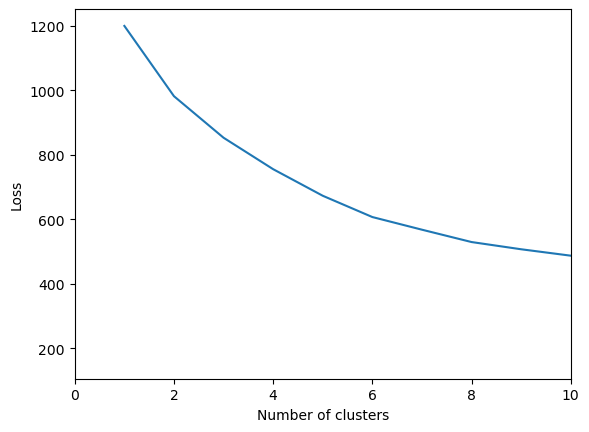

In [27]:
### Zooming in
plt.plot(clusters, losses)
plt.xlim([0,10])
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

In [28]:
### The optimal amount of clusters lies between 5 and 6, which is why we are starting with five 
five_means = KMeans(n_clusters=5)
five_means.fit(bikesharing_sample)
five_means.predict(bikesharing_sample)

array([2, 1, 4, 1, 4, 1, 4, 2, 2, 0, 3, 4, 4, 1, 1, 2, 1, 2, 1, 4, 2, 3,
       1, 4, 2, 2, 2, 0, 0, 2, 4, 2, 1, 2, 2, 2, 4, 4, 2, 1, 1, 2, 2, 2,
       2, 0, 0, 1, 4, 0, 0, 2, 2, 1, 4, 1, 4, 2, 1, 4, 2, 4, 1, 1, 1, 2,
       1, 2, 1, 0, 4, 2, 4, 2, 3, 3, 4, 1, 2, 1, 1, 2, 4, 4, 1, 0, 4, 2,
       0, 0, 4, 2, 2, 2, 4, 0, 1, 3, 4, 2, 1, 4, 2, 0, 2, 0, 1, 0, 1, 4,
       0, 2, 2, 4, 4, 2, 1, 4, 2, 4, 3, 2, 1, 2, 2, 0, 3, 0, 1, 1, 1, 2,
       4, 1, 0, 2, 1, 0, 0, 3, 2, 2, 2, 1, 2, 2, 1, 2, 2, 4, 1, 4, 1, 0,
       1, 4, 4, 4, 2, 2, 1, 4, 2, 2, 2, 2, 2, 4, 1, 1, 4, 2, 2, 1, 4, 2,
       0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 0, 4, 4, 0, 4, 2, 2, 0, 1, 1, 2,
       4, 4], dtype=int32)

In [69]:
## Add assigned clusters as a new column -> not necessary 
## five_means.labels_
## bikesharing_sample['categories'] = five_means.labels_
## bikesharing_sample.head()

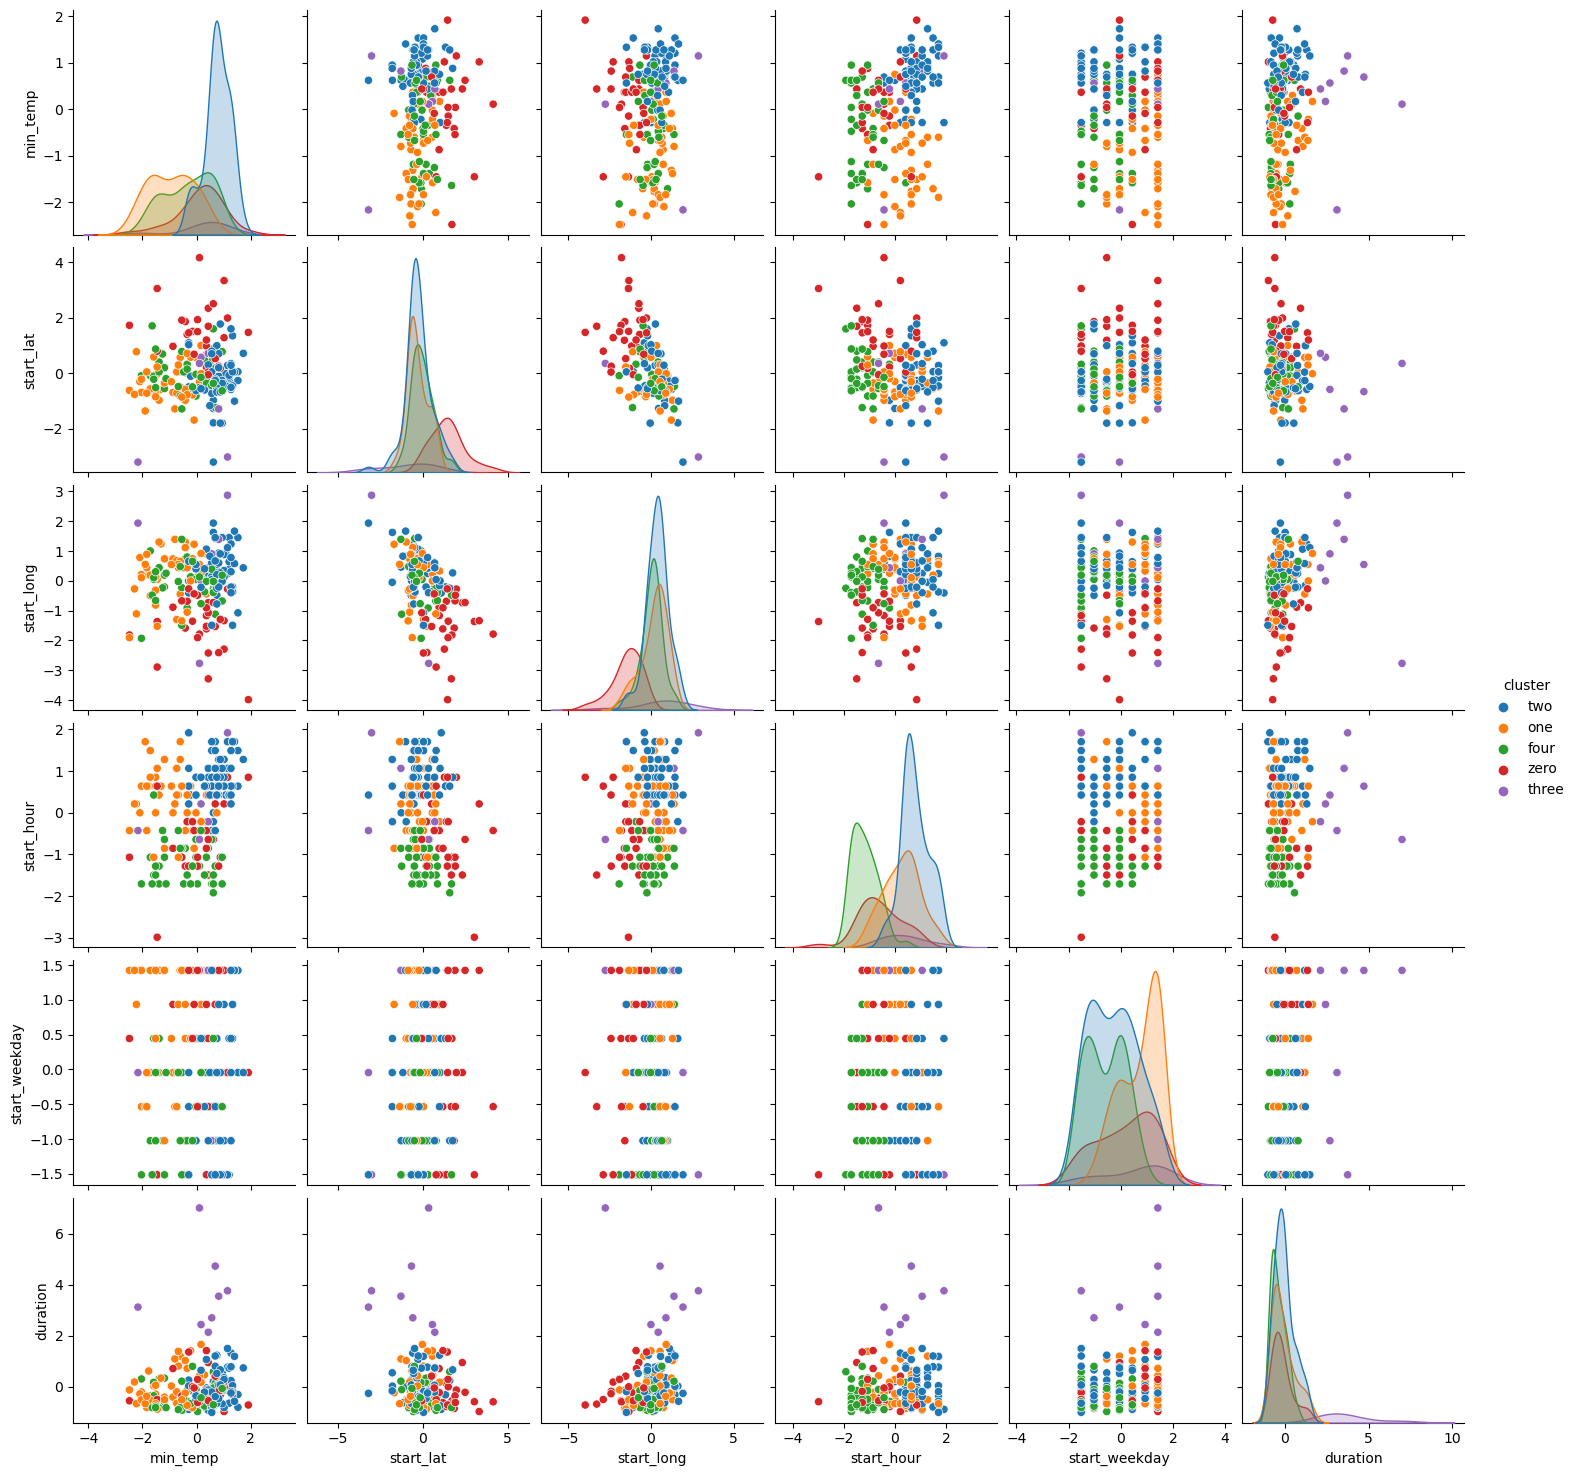

In [29]:
numbers = ["zero", "one", "two", "three", "four"]

bikesharing_sample["cluster"] = five_means.predict(bikesharing_sample)
bikesharing_sample["cluster"] = bikesharing_sample["cluster"].apply(lambda x: numbers[x])
sns.pairplot(data=bikesharing_sample, hue="cluster")

In [37]:
bikesharing_sample.sort_index(inplace=True)
bikesharing_sample

,min_temp,start_lat,start_long,start_hour,start_weekday,duration,cluster
0,0.689885,0.522818,-1.532066,0.208986,0.932215,0.406826,zero
1,-0.545591,-0.860614,-1.343140,0.635488,1.421567,-0.517939,one
2,-1.711135,-0.553748,0.191796,1.488493,1.421567,-0.770965,one
3,-1.641202,1.701315,-0.479532,-1.710274,-1.514543,-0.826194,four
4,1.144447,-3.015675,2.872119,1.914995,-1.514543,3.753962,three
...,...,...,...,...,...,...,...
195,0.037181,1.493626,-1.904958,-1.070521,1.421567,0.280955,zero
196,-0.603868,-0.822812,0.478834,-0.857270,-1.025192,-0.826194,four
197,0.748162,-0.532807,-0.777224,0.848739,-0.046488,0.513431,two
198,0.818095,-1.285506,1.392587,1.061991,1.421567,3.542037,three


In [38]:
bikesharing_relevant["cluster"] = bikesharing_sample["cluster"]

# Interpreting the clustering outcome

In [39]:
### Looking at cluster "zero"

bikesharing_relevant[bikesharing_relevant.values  == "zero"].describe()

,start_hour,start_weekday,min_temp,precip,duration,start_lat,start_long
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,11.241379,3.482759,17.875862,0.068966,754.275862,41.952686,-87.676550
std,4.058986,2.181426,7.620867,0.257881,485.347144,0.035067,0.019910
min,0.000000,0.000000,-4.400000,0.000000,120.000000,41.899643,-87.732002
25%,9.000000,2.000000,14.400000,0.000000,417.000000,41.929567,-87.684146
50%,11.000000,4.000000,20.000000,0.000000,665.000000,41.952833,-87.673930
75%,13.000000,5.000000,22.200000,0.000000,875.000000,41.968873,-87.660274
max,18.000000,6.000000,33.300000,1.000000,1980.000000,42.048214,-87.649993


In [40]:
### Looking at cluster "one"
bikesharing_relevant[bikesharing_sample.values  == "one"].describe()

,start_hour,start_weekday,min_temp,precip,duration,start_lat,start_long
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,15.270833,4.583333,8.864583,0.083333,814.458333,41.890565,-87.639584
std,3.279463,1.527525,7.245791,0.279310,533.154481,0.021588,0.017502
min,9.000000,1.000000,-4.400000,0.000000,192.000000,41.842052,-87.686113
25%,13.000000,3.000000,3.025000,0.000000,366.750000,41.876953,-87.650272
50%,16.000000,5.000000,9.700000,0.000000,660.000000,41.883811,-87.636058
75%,17.000000,6.000000,14.175000,0.000000,1110.750000,41.903247,-87.627754
max,22.000000,6.000000,23.300000,1.000000,2168.000000,41.936669,-87.613348


In [41]:
### Looking at cluster "two"
bikesharing_relevant[bikesharing_relevant.values  == "two"].describe()

,start_hour,start_weekday,min_temp,precip,duration,start_lat,start_long
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,17.671429,2.557143,23.460000,0.028571,846.814286,41.892326,-87.635798
std,2.529372,1.893051,4.065707,0.167802,469.683405,0.027964,0.014831
min,12.000000,0.000000,14.400000,0.000000,95.000000,41.788746,-87.676950
25%,16.000000,1.000000,21.700000,0.000000,523.500000,41.880317,-87.644360
50%,17.000000,3.000000,23.300000,0.000000,754.500000,41.888480,-87.635253
75%,19.000000,4.000000,26.700000,0.000000,1076.500000,41.903310,-87.627036
max,23.000000,6.000000,31.700000,1.000000,2045.000000,41.963982,-87.601334


In [42]:
### Looking at cluster "three"
bikesharing_relevant[bikesharing_relevant.values  == "three"].describe()

,start_hour,start_weekday,min_temp,precip,duration,start_lat,start_long
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,15.750000,4.125000,18.762500,0.125000,3743.500000,41.870254,-87.629395
std,3.955105,2.474874,8.763225,0.353553,1227.724492,0.054007,0.036699
min,11.000000,0.000000,-1.700000,0.000000,2541.000000,41.788746,-87.705126
25%,12.750000,2.500000,18.175000,0.000000,2929.500000,41.841004,-87.636857
50%,15.500000,5.500000,21.150000,0.000000,3475.000000,41.879601,-87.628035
75%,17.500000,6.000000,23.075000,0.000000,3994.500000,41.915976,-87.610344
max,23.000000,6.000000,26.700000,1.000000,6335.000000,41.926756,-87.580715


In [43]:
### Looking at cluster "four"
bikesharing_relevant[bikesharing_relevant.values  == "four"].describe()

,start_hour,start_weekday,min_temp,precip,duration,start_lat,start_long
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,8.488889,1.911111,14.222222,0.044444,587.955556,41.900590,-87.643370
std,2.370483,1.504874,7.478390,0.208409,348.146779,0.022812,0.014381
min,5.000000,0.000000,-0.600000,0.000000,120.000000,41.856268,-87.686596
25%,6.000000,1.000000,6.700000,0.000000,285.000000,41.883380,-87.649260
50%,8.000000,2.000000,15.000000,0.000000,495.000000,41.898418,-87.641170
75%,10.000000,3.000000,21.700000,0.000000,795.000000,41.915689,-87.634600
max,16.000000,5.000000,25.000000,1.000000,1500.000000,41.961670,-87.612795


## Principal Component Analysis (PCA)

In [93]:
### Running Principal Component Analysis
bikesharing_sample = bikesharing_transformed.sample(200, random_state=200)[continuous_cols + ordinal_cols]
pca = PCA(n_components=1)
X_pca = pca.fit_transform(bikesharing_sample)
pca.components_

array([[ 0.18601305, -0.60975802,  0.58559251,  0.49103244, -0.03515444,
         0.09125248]])

In [75]:
pca.explained_variance_ratio_[0]

0.32048419992767246

In [76]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(bikesharing_sample)
sum(pca.explained_variance_ratio_)

0.7489764048057757

In [77]:
bikesharing_pca = pd.DataFrame(X_pca, columns=["First PC", "Second PC", "Third PC"], index=bikesharing_sample.index)
bikesharing_pca.head()

,First PC,Second PC,Third PC
1818173,-0.953009,1.496828,0.214473
3345318,-0.097204,1.179182,-1.058249
41418,0.785796,0.920700,-1.698792
3589945,-2.387052,-2.014852,0.153903
2375757,4.750948,-0.970025,0.901876


c:\Users\annal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


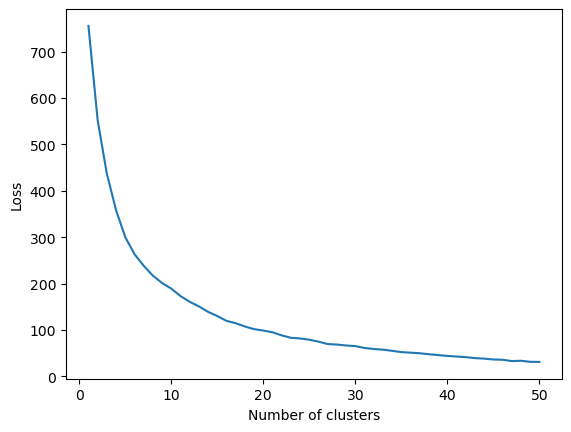

In [78]:
pca_clusters = []
pca_losses = []

for i in range(k_max):
    model = KMeans(n_clusters=i+1)
    model.fit(X_pca)
    pca_clusters.append(i+1)
    pca_losses.append(model.inertia_)
    
plt.plot(pca_clusters, pca_losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

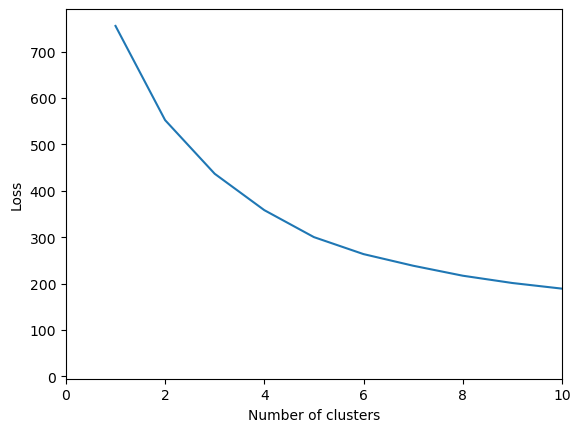

In [79]:
plt.plot(pca_clusters, pca_losses)
plt.xlim([0,10])
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

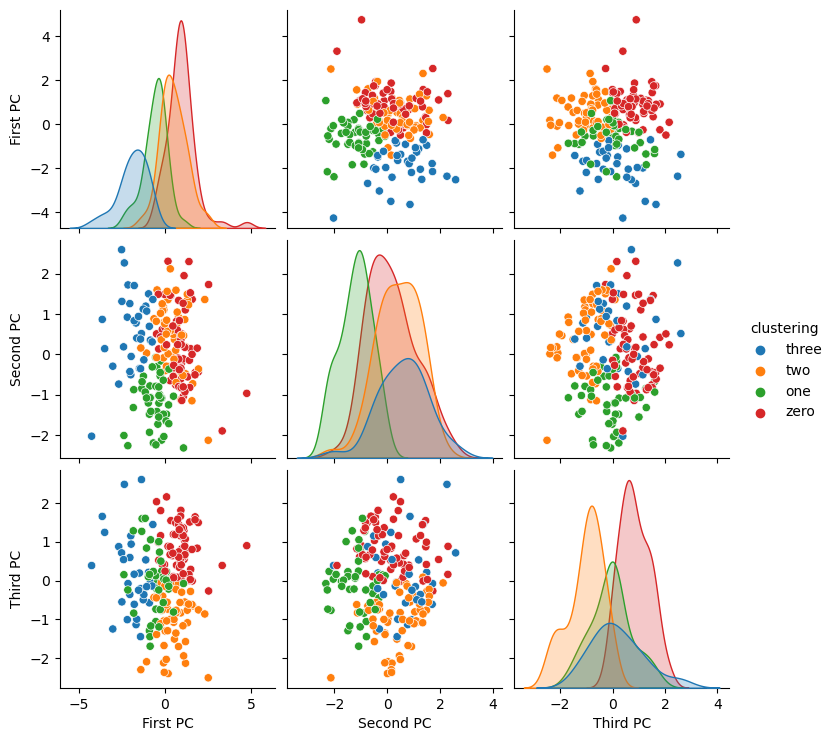

In [80]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(bikesharing_pca)
kmeans.predict(bikesharing_pca)
numbers = ["zero", "one", "two", "three"]
bikesharing_pca["clustering"] = kmeans.predict(bikesharing_pca)
bikesharing_pca["clustering"] = bikesharing_pca["clustering"].apply(lambda x: numbers[x])
sns.pairplot(data=bikesharing_pca, hue="clustering")

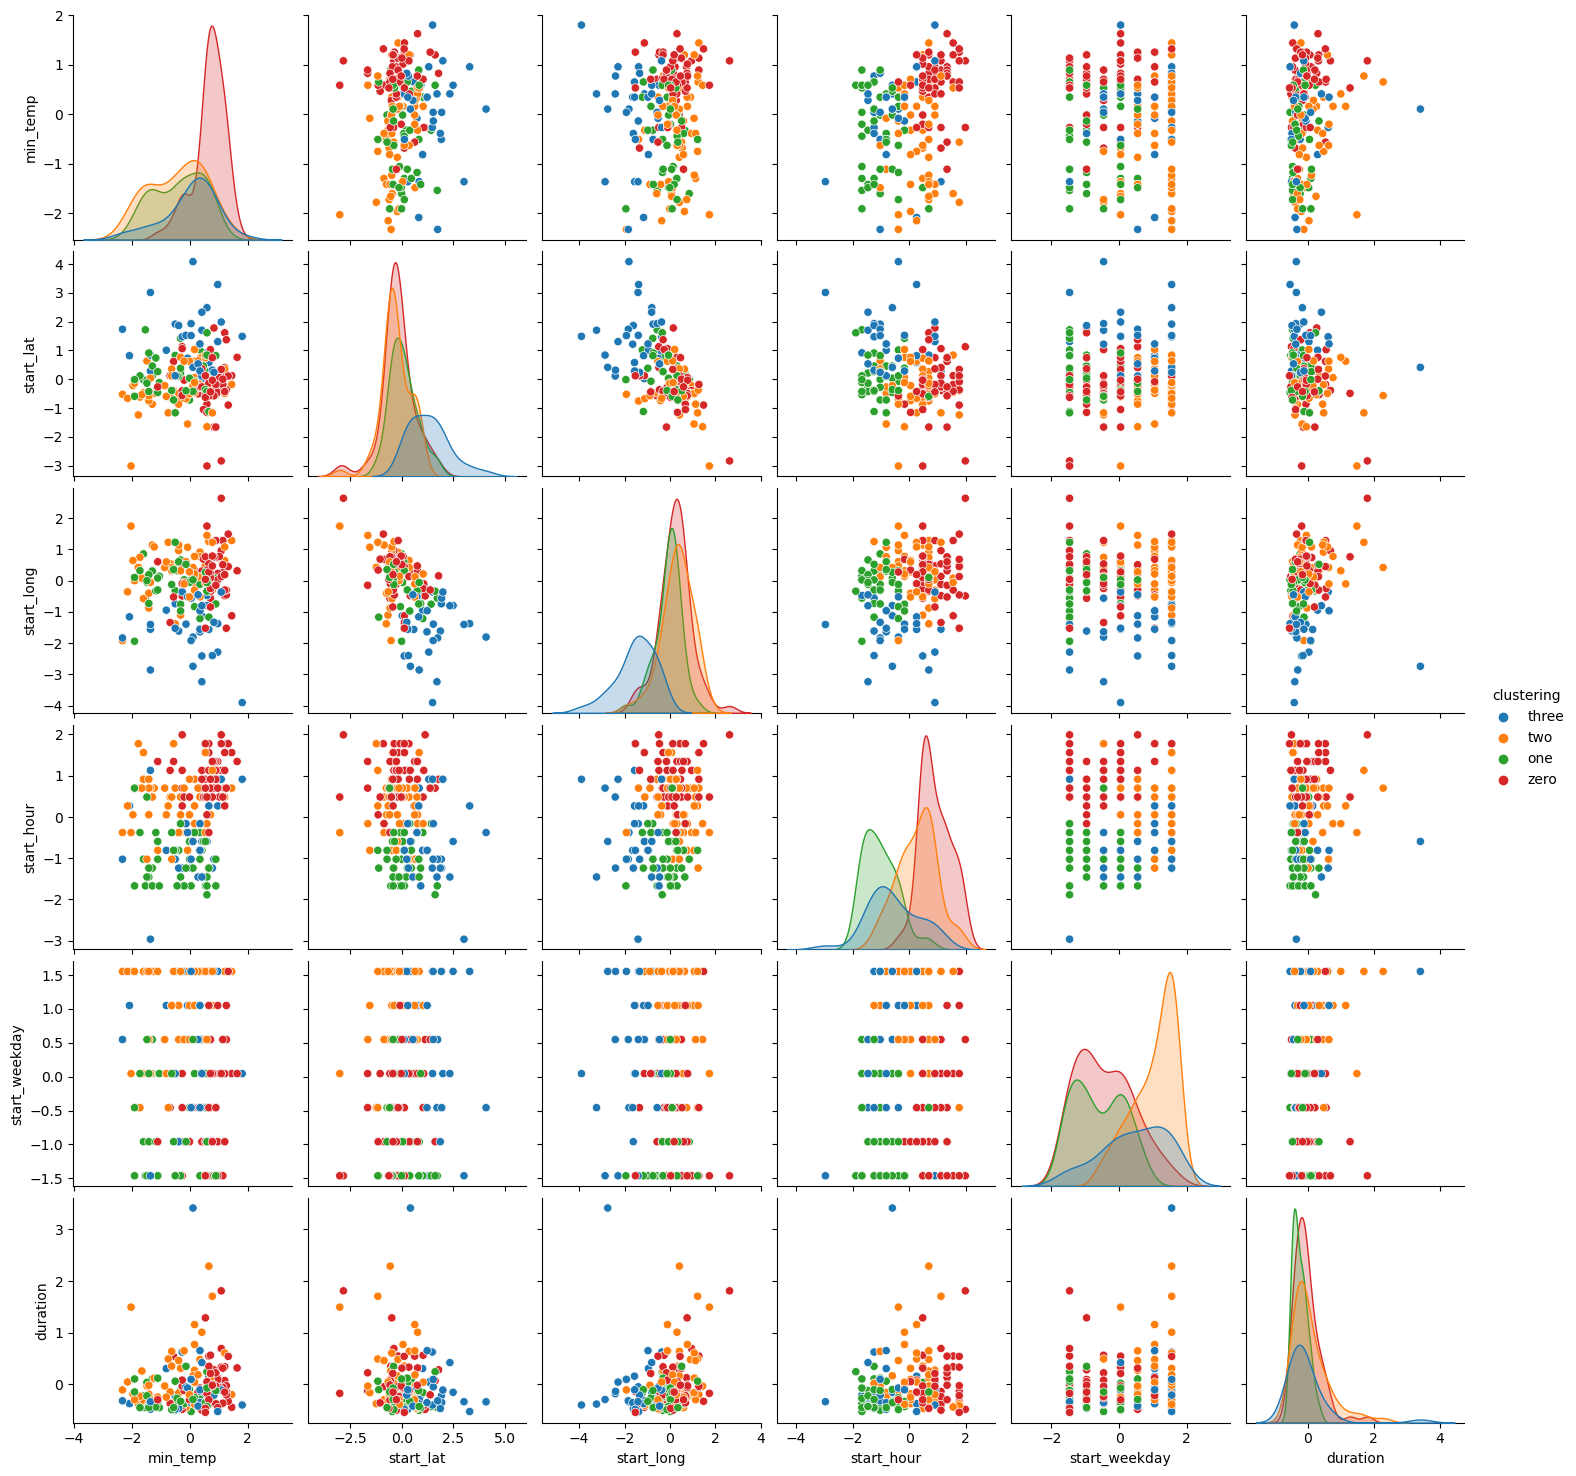

In [81]:
bikesharing_sample["clustering"] = bikesharing_pca["clustering"]
sns.pairplot(data=bikesharing_sample, hue="clustering")

In [82]:
def interpret(x):
    if x == "zero":
        x = "Leisure Trips"
    elif x == "one":
        x = "Afternoon Trip Warm"
    elif x == "two":
        x = "Afternoon Trip Cold"
    else:
        x = "Morning Trip"
    return x
        
bikesharing_sample["clustering"] = bikesharing_sample["clustering"].apply(lambda x: interpret(x))

In [83]:
bikesharing_sample

,min_temp,start_lat,start_long,start_hour,start_weekday,duration,clustering
1818173,0.653736,0.576894,-1.564364,0.267073,1.050558,0.154907,Morning Trip
3345318,-0.508422,-0.758782,-1.384470,0.697928,1.553288,-0.301979,Afternoon Trip Cold
41418,-1.604797,-0.462509,0.077081,1.559638,1.553288,-0.426988,Afternoon Trip Cold
3589945,-1.539015,1.714708,-0.562150,-1.671776,-1.463095,-0.454274,Afternoon Trip Warm
2375757,1.081322,-2.839447,2.629260,1.990494,-1.463095,1.808582,Leisure Trips
...,...,...,...,...,...,...,...
906271,0.039765,1.514188,-1.919428,-1.025493,1.553288,0.092720,Morning Trip
3678622,-0.563241,-0.722284,0.350397,-0.810065,-0.960364,-0.454274,Afternoon Trip Warm
2553516,0.708554,-0.442290,-0.845611,0.913356,0.045097,0.207576,Leisure Trips
2606609,0.774337,-1.169005,1.220464,1.128783,1.553288,1.703879,Afternoon Trip Cold


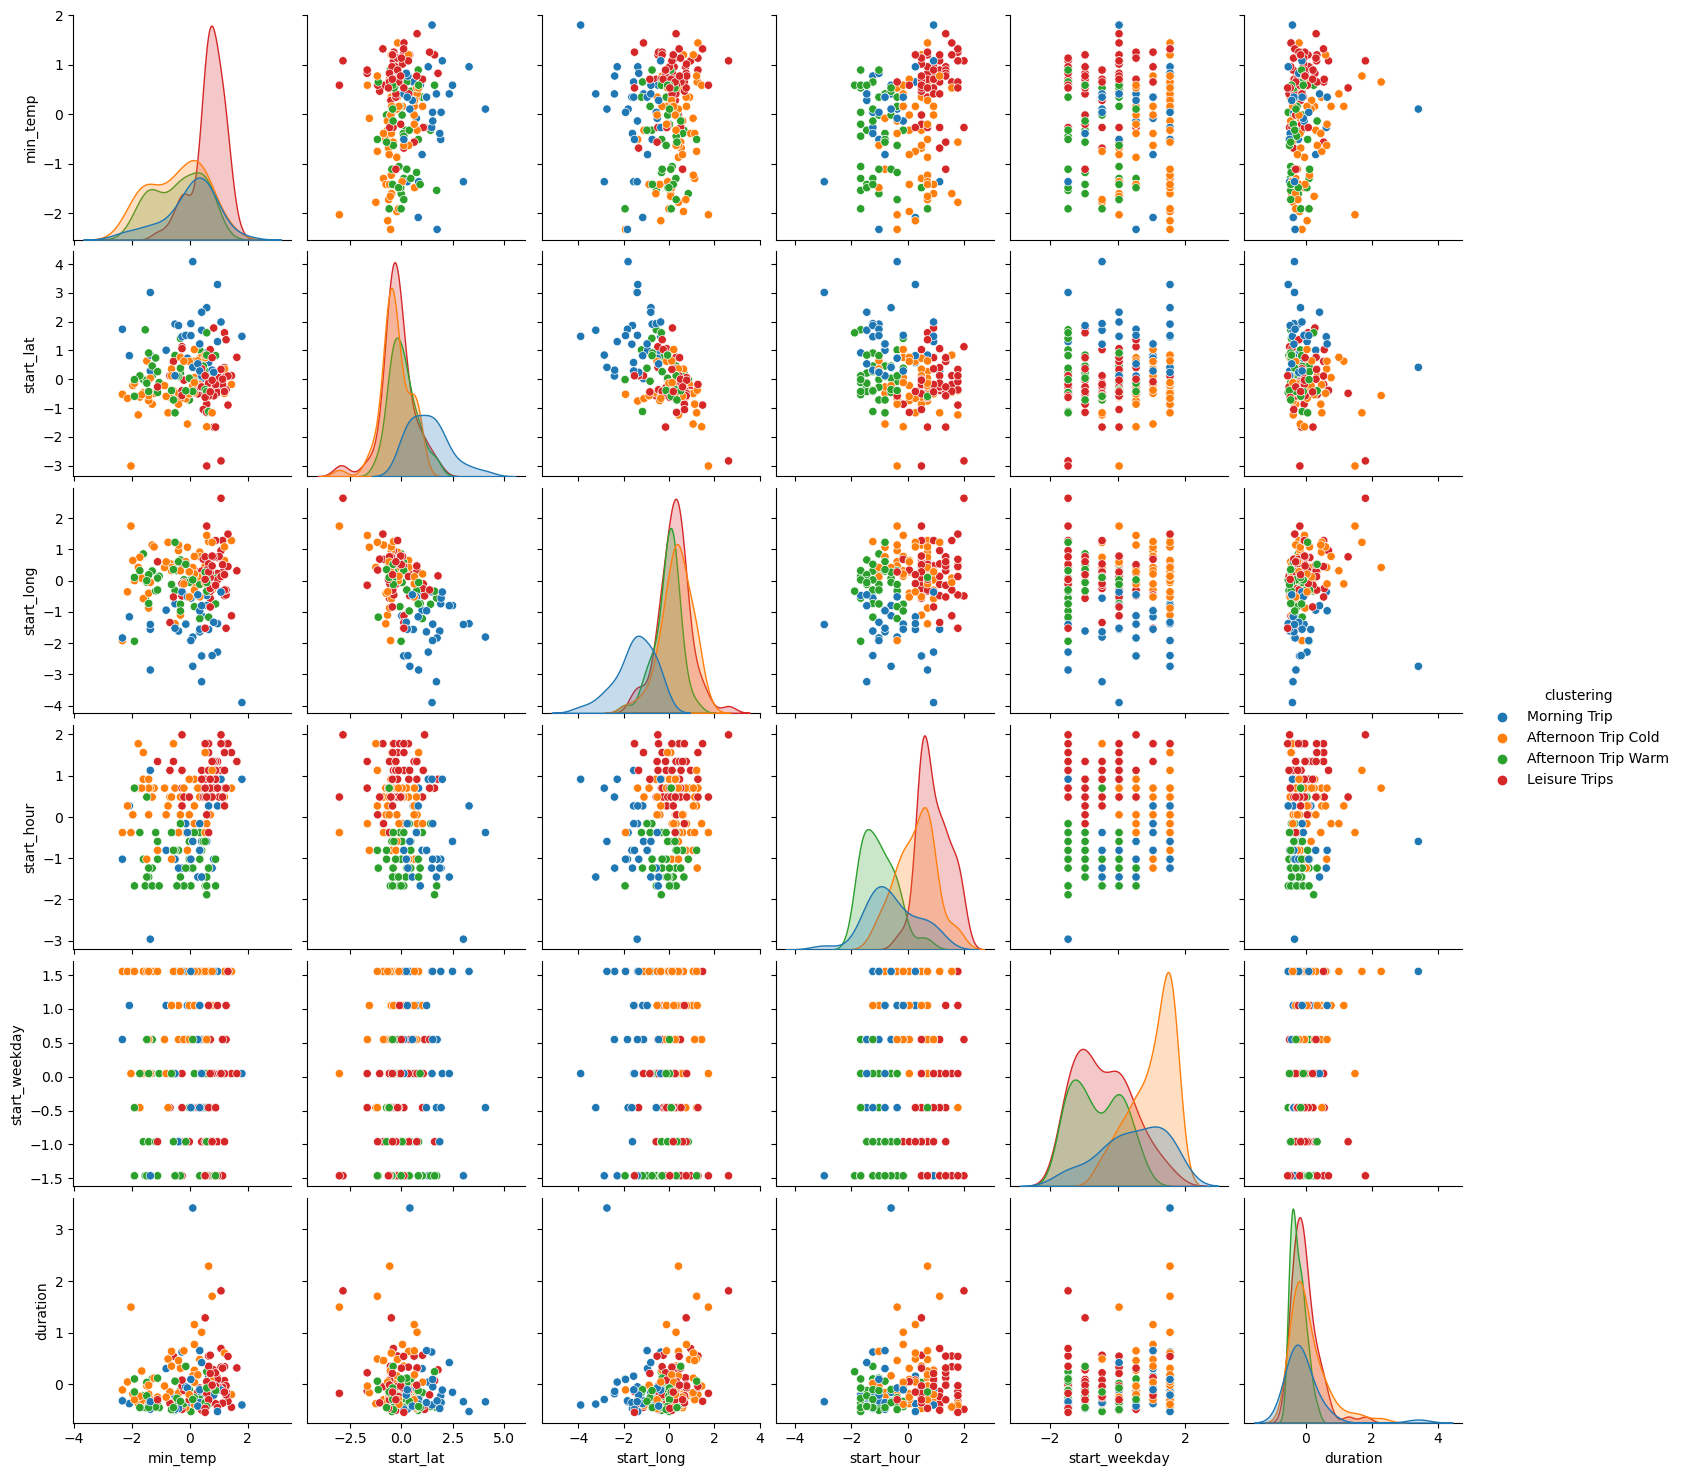

In [84]:
sns.pairplot(data=bikesharing_sample, hue="clustering")